# Project Capstone
## Business Problem 

in the City of York in Canada a business man from the united states wants to open a resturant , we need to analyse 
which neighborhood is has the best location in order to make this resturant famous and gain a good profit 
the neighborhood should not have any near resturants and has to be close to people's work and it should be easy to find 

## Data Section

we will have to export the following libraries and use the wikipedia web page which has information about cities of canada 
also we will use an  csv file in order to get the location (Longtitude , latitude )
### so First: 

In [315]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import requests

import lxml.html as lh


print('Libraries imported.')

Libraries imported.


In [1]:
pip install geopy

     |████████████████████████████████| 122kB 3.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade lxml

     |████████████████████████████████| 5.5MB 6.3MB/s eta 0:00:01     |██████▉                         | 1.2MB 6.3MB/s eta 0:00:01��▏  | 5.0MB 6.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 5.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


#### create a data frame for the canada's cities using wikipedia 

In [277]:
import requests

from bs4 import BeautifulSoup

req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

neighborhood=pd.DataFrame(df[0])

neighborhood.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### Remove when the BOROUGH is not assigned

In [278]:
indexNames = neighborhood[ neighborhood['Borough'] == 'Not assigned'].index
neighborhood.drop(indexNames , inplace=True)

#### if any rows has the same postal code we will merge them 

In [279]:
df = neighborhood.groupby(['Postal Code','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [230]:
#df['Borough'].unique()


#### read the CSV file whic provide us with the Latitude Longitude

In [280]:
data = pd.read_csv (r'https://cocl.us/Geospatial_data')
data.head()



,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Create the final data frame contains all the information from the prevuise dataframes 

In [281]:
df_all= pd.merge(df, data)

df_all.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### create the York data frame in order to use it in our data analyzing and visualization 

In [282]:
York_df = df_all.loc[df_all['Borough'].str.contains("York")]
York_df.head()


,Postal Code,Borough,Neighborhood,Latitude,Longitude
17,M2H,North York,Hillcrest Village,43.803762,-79.363452
18,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
19,M2K,North York,Bayview Village,43.786947,-79.385975
20,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
21,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493


## Second:
#### we will use foursquare in order to get all the information which will help us to decide which neighbourhood 
#### is better for opening our resturant 

In [283]:
CLIENT_ID = '1YN3W4XLL0JZQGC5UOLQ0OJUCQCV4TDJFGE2WXP3C4AKPEDX' # your Foursquare ID
CLIENT_SECRET = 'PSENOXYLMTFTEPXD3DGJP1MXYBDO50NFW5TCQSAPIEII04CF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1YN3W4XLL0JZQGC5UOLQ0OJUCQCV4TDJFGE2WXP3C4AKPEDX
CLIENT_SECRET:PSENOXYLMTFTEPXD3DGJP1MXYBDO50NFW5TCQSAPIEII04CF


In [284]:
York_df['Neighborhood'].iloc[0]


'Hillcrest Village'

In [285]:
neighborhood_latitude =York_df['Latitude'].iloc[0] # neighborhood latitude value
neighborhood_longitude = York_df['Longitude'].iloc[0] # neighborhood longitude value

neighborhood_name =York_df['Neighborhood'].iloc[0]
# neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Hillcrest Village are 43.8037622, -79.3634517.


In [21]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    
    LIMIT)
url
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec517c7d03993001c12fbb7'},
 'response': {'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.808262204500004,
    'lng': -79.3572281853783},
   'sw': {'lat': 43.7992621955, 'lng': -79.3696752146217}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad9dce6f964a520651b21e3',
       'name': "Eagle's Nest Golf Club",
       'location': {'address': '10000 Dufferin Rd',
        'lat': 43.805454826002794,
        'lng': -79.36418592243415,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.805454826002794,
          'lng': -79.36418592243415}],
        'distance': 197,
        'cc': 'CA',
        'city': 'Toronto

In [286]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [287]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]


nearby_venues.head()

,name,categories,lat,lng
0,Eagle's Nest Golf Club,Golf Course,43.805455,-79.364186
1,AY Jackson Pool,Pool,43.804515,-79.366138
2,Villa Madina,Mediterranean Restaurant,43.801685,-79.363938
3,Duncan Creek Park,Dog Run,43.805539,-79.360695


In [288]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


4 venues were returned by Foursquare.


In [289]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [290]:
York_venues = getNearbyVenues(names=York_df['Neighborhood'],
                                   latitudes=York_df['Latitude'],
                                   longitudes=York_df['Longitude']
                                  )

Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto
Bedford Park, Lawrence Manor East
Lawrence Manor, Lawrence Heights
Glencairn
Humewood-Cedarvale
Caledonia-Fairbanks
North Park, Maple Leaf Park, Upwood Park
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Runnymede, The Junction North
Humber Summit
Humberlea, Emery
Weston


In [273]:
print (York_venues.shape)
YV=York_venues
York_venues.head()


(267, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
3,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
5,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,DAVIDsTEA,43.777593,-79.345089,Tea Room


In [291]:
York_df2 = York_venues.loc[York_venues['Venue Category'].str.contains("Restaurant")]
York_df2.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Hillcrest Village,43.803762,-79.363452,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant
11,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,New York Fries - Fairview Mall,43.778605,-79.343577,Restaurant
17,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Moxie's Classic Grill,43.777779,-79.343185,American Restaurant
24,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Thai Express,43.777990,-79.344091,Restaurant
30,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Heart Sushi,43.777203,-79.343805,Japanese Restaurant


In [292]:
York_df2.shape

(62, 7)

In [293]:
df5=York_df2[['Neighborhood','Venue']].groupby('Neighborhood')
df5.head()
df5.count()


,Venue
Neighborhood,
"Bathurst Manor, Wilson Heights, Downsview North",3
Bayview Village,2
"Bedford Park, Lawrence Manor East",9
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",1
Don Mills,10
Downsview,1
"Fairview, Henry Farm, Oriole",11
Glencairn,1
Hillcrest Village,1


In [294]:
York_df2['Venue Category'].unique()

array(['Mediterranean Restaurant', 'Restaurant', 'American Restaurant',
       'Japanese Restaurant', 'Fast Food Restaurant', 'Asian Restaurant',
       'Chinese Restaurant', 'Ramen Restaurant', 'Indonesian Restaurant',
       'Sushi Restaurant', 'Middle Eastern Restaurant',
       'Vietnamese Restaurant', 'Caribbean Restaurant',
       'Italian Restaurant', 'Dim Sum Restaurant', 'Korean Restaurant',
       'Portuguese Restaurant', 'Mexican Restaurant', 'Indian Restaurant',
       'Thai Restaurant', 'Comfort Food Restaurant', 'Greek Restaurant'],
      dtype=object)

### how many venues (restuarants) exist in eaxh neiborhood 

In [295]:
Y1=York_df2.groupby('Neighborhood').count()
Y1.head()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",3,3,3,3,3,3
Bayview Village,2,2,2,2,2,2
"Bedford Park, Lawrence Manor East",9,9,9,9,9,9
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",1,1,1,1,1,1
Don Mills,10,10,10,10,10,10


In [296]:
df6=York_df2[['Neighborhood','Venue']]
df6.head()
df7= df6.groupby('Neighborhood').count()


In [32]:
Y1.columns = list(map(str, Y1.columns))
Y11=Y1.drop('Neighborhood Latitude',1)
Y11.drop(['Neighborhood Longitude', 'Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
Y11

,Venue
Neighborhood,
"Bathurst Manor, Wilson Heights, Downsview North",3
Bayview Village,2
"Bedford Park, Lawrence Manor East",9
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",1
Don Mills,10
Downsview,1
"Fairview, Henry Farm, Oriole",11
Glencairn,1
Hillcrest Village,1


In [297]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


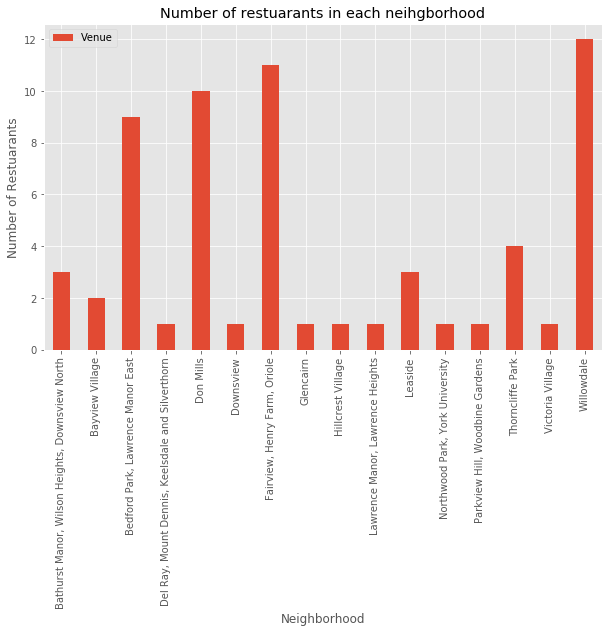

In [316]:
Y11.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Restuarants') # add y-label to the plot
plt.title('Number of restuarants in each neihgborhood') # add title to the plot

plt.show()

In [ ]:
Lista= {'Bathurst Manor, Wilson Heights, Downsview North','Bayview Village','Del Ray, Mount Dennis, Keelsdale and Silverthorn'
       , 'Downsview', 'Glencairn','Hillcrest Village','Lawrence Manor, Lawrence Heights','Leaside','Northwood Park, York University'
       ,'Parkview Hill, Woodbine Gardens','Parkview Hill, Woodbine Gardens','Victoria Village'}

In [299]:
York_onehot1 = pd.get_dummies(York_df2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
York_onehot1['Neighborhood'] = York_df2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [York_onehot1.columns[-1]] + list(York_onehot1.columns[:-1])
York_onehot1 = York_onehot1[fixed_columns]

York_onehot1.head()

,Neighborhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant
2,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17,"Fairview, Henry Farm, Oriole",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
30,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [300]:
York_grouped1 = York_onehot1.groupby('Neighborhood').mean().reset_index()
York_grouped1.head()


,Neighborhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.333333,0.000000,0.0
1,Bayview Village,0.000000,0.0,0.0,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,"Bedford Park, Lawrence Manor East",0.111111,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0.111111,0.0,0.222222,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.111111,0.111111,0.0
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0
4,Don Mills,0.000000,0.2,0.1,0.1,0.000000,0.1,0.0,0.000000,0.000000,0.0,0.100000,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.200000,0.000000,0.000000,0.0


In [301]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [302]:
# num venues resturants
num_top_venues = 5
for hood in York_grouped1['Neighborhood']:
    print("----"+hood+"----")
    temp = York_grouped1[York_grouped1['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0           Sushi Restaurant  0.33
1                 Restaurant  0.33
2  Middle Eastern Restaurant  0.33
3        American Restaurant  0.00
4           Asian Restaurant  0.00


----Bayview Village----
                 venue  freq
0  Japanese Restaurant   0.5
1   Chinese Restaurant   0.5
2    Korean Restaurant   0.0
3      Thai Restaurant   0.0
4     Sushi Restaurant   0.0


----Bedford Park, Lawrence Manor East----
                     venue  freq
0       Italian Restaurant  0.22
1      American Restaurant  0.11
2          Thai Restaurant  0.11
3         Sushi Restaurant  0.11
4  Comfort Food Restaurant  0.11


----Del Ray, Mount Dennis, Keelsdale and Silverthorn----
                 venue  freq
0           Restaurant   1.0
1  American Restaurant   0.0
2     Asian Restaurant   0.0
3      Thai Restaurant   0.0
4     Sushi Restaurant   0.0


----Don Mills----
                  venue  freq
0   Japan

In [303]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [105]:
num_top_venues = 10


indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restuarant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restuarant'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted6 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted6['Neighborhood'] = York_grouped1['Neighborhood']

for ind in np.arange(York_grouped1.shape[0]):
    neighborhoods_venues_sorted6.iloc[ind, 1:] = return_most_common_venues(York_grouped1.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted6.head()

,Neighborhood,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
0,"Bathurst Manor, Wilson Heights, Downsview North",Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
1,Bayview Village,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
2,"Bedford Park, Lawrence Manor East",Italian Restaurant,Thai Restaurant,Comfort Food Restaurant,Greek Restaurant,Indian Restaurant,American Restaurant,Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Mexican Restaurant
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
4,Don Mills,Asian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indonesian Restaurant,Comfort Food Restaurant,Fast Food Restaurant


###  let us query the neighborhoods wich has the least number of retaurants and what are the most common trends 

### WE WILL CONTINUE WITH CLUSTERING ONLY THE NEIGBOUR HOODS THAT WE HAVEE CHOSEN WHICH HAVE THE LEAST NUMBER OF REATAURANTS 

In [70]:
Result11=neighborhoods_venues_sorted5.query('Neighborhood=="Bathurst Manor, Wilson Heights, Downsview North" or Neighborhood=="Bayview Village" or Neighborhood=="Victoria Village" or Neighborhood=="Del Ray, Mount Dennis, Keelsdale and Silverthorn" or Neighborhood=="Downsview" or Neighborhood=="Glencairn" or Neighborhood=="Hillcrest Village" or Neighborhood=="Lawrence Manor, Lawrence Heights" or Neighborhood=="Leaside" or Neighborhood=="Northwood Park, York University" or Neighborhood=="Parkview Hill, Woodbine Gardens"')
#Lista= {'Bathurst Manor, Wilson Heights, Downsview North','Bayview Village','Del Ray, Mount Dennis, Keelsdale and Silverthorn' 
     #  , 'Downsview', 'Glencairn','Hillcrest Village','Lawrence Manor, Lawrence Heights','Leaside','Northwood Park, York University'
     #  ,'Parkview Hill, Woodbine Gardens','Parkview Hill, Woodbine Gardens','Victoria Village'}
Result11

,Neighborhood,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
0,"Bathurst Manor, Wilson Heights, Downsview North",Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
1,Bayview Village,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
3,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
5,Downsview,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
7,Glencairn,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
8,Hillcrest Village,Mediterranean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
9,"Lawrence Manor, Lawrence Heights",Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant
10,Leaside,Sushi Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
11,"Northwood Park, York University",Caribbean Restaurant,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant
12,"Parkview Hill, Woodbine Gardens",Fast Food Restaurant,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Greek Restaurant,Indian Restaurant


### Modeling Using K Mean Clustering 

#### First we need to choose the best K for the Number of clusters 

In [71]:


York_grouped_clustering= York_grouped1.drop('Neighborhood', 1)



In [72]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(York_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

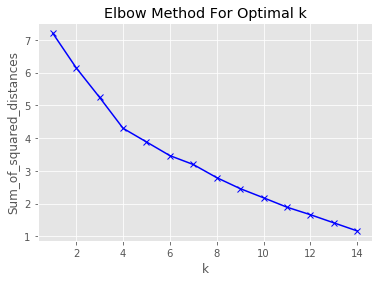

In [317]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [104]:
kclusters=6
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(York_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 5, 0, 0, 0, 1, 0, 5, 2, 0], dtype=int32)

In [106]:
neighborhoods_venues_sorted6.insert(0, 'Cluster Labels', kmeans.labels_)

In [107]:
# add clustering labels

York_merged = York_df
York_merged = York_merged.join(neighborhoods_venues_sorted6.set_index('Neighborhood'), on='Neighborhood')

York_merged.head() # check the last columns!



,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,2.0,Mediterranean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
18,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0.0,Fast Food Restaurant,Japanese Restaurant,Restaurant,American Restaurant,Asian Restaurant,Indonesian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
19,M2K,North York,Bayview Village,43.786947,-79.385975,5.0,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
20,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
York_merged1=York_merged.fillna(10)

York_merged1
indexNames1 = York_merged1[ York_merged1['Cluster Labels'] ==10.0].index
York_merged1.drop(indexNames1 , inplace=True)
York_merged1.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,2.0,Mediterranean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
18,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0.0,Fast Food Restaurant,Japanese Restaurant,Restaurant,American Restaurant,Asian Restaurant,Indonesian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
19,M2K,North York,Bayview Village,43.786947,-79.385975,5.0,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
22,M2N,North York,Willowdale,43.770120,-79.408493,0.0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
24,M2R,North York,Willowdale,43.782736,-79.442259,0.0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant


In [305]:
York_merged1['Cluster Labels']=York_merged1['Cluster Labels'].astype(int)

In [306]:
York_merged1.head()


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,2,Mediterranean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
18,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0,Fast Food Restaurant,Japanese Restaurant,Restaurant,American Restaurant,Asian Restaurant,Indonesian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
19,M2K,North York,Bayview Village,43.786947,-79.385975,5,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
22,M2N,North York,Willowdale,43.770120,-79.408493,0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
24,M2R,North York,Willowdale,43.782736,-79.442259,0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant


In [307]:
latitude= 43.6957
longitude= -79.4504

In [318]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(York_merged1['Latitude'], York_merged1['Longitude'], York_merged1['Neighborhood'], York_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

## Examine Clusters

### examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories¶

#### Cluster 1

In [112]:
York_merged1.loc[York_merged1['Cluster Labels'] == 0, York_merged1.columns[[2] + list(range(4, York_merged1.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
18,"Fairview, Henry Farm, Oriole",-79.346556,0,Fast Food Restaurant,Japanese Restaurant,Restaurant,American Restaurant,Asian Restaurant,Indonesian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
22,Willowdale,-79.408493,0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
24,Willowdale,-79.442259,0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
26,Don Mills,-79.352188,0,Asian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indonesian Restaurant,Comfort Food Restaurant,Fast Food Restaurant
27,Don Mills,-79.340923,0,Asian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indonesian Restaurant,Comfort Food Restaurant,Fast Food Restaurant
28,"Bathurst Manor, Wilson Heights, Downsview North",-79.442259,0,Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
35,"Parkview Hill, Woodbine Gardens",-79.309937,0,Fast Food Restaurant,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Greek Restaurant,Indian Restaurant
38,Leaside,-79.363452,0,Sushi Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
39,Thorncliffe Park,-79.349372,0,Indian Restaurant,Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
62,"Bedford Park, Lawrence Manor East",-79.419750,0,Italian Restaurant,Thai Restaurant,Comfort Food Restaurant,Greek Restaurant,Indian Restaurant,American Restaurant,Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Mexican Restaurant


#### we can see that the popular categories of restaurant in these neibourhood are Sushi , fast food  , Chinese and indian 

#### Cluster 2 

In [120]:
York_merged1.loc[York_merged1['Cluster Labels'] == 1, York_merged1.columns[[2] + list(range(4, York_merged1.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
30,Downsview,-79.464763,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
31,Downsview,-79.506944,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
32,Downsview,-79.495697,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
33,Downsview,-79.520999,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant


#### Theses two neighborhoods also prefer Asian food such as chinese and japanese and greek 

#### Cluster 3 

In [98]:
York_merged1.loc[York_merged1['Cluster Labels'] == 2, York_merged1.columns[[2] + list(range(4, York_merged1.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
71,"Lawrence Manor, Lawrence Heights",-79.464763,2,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant,Indian Restaurant


#### this neighborhood prefers Veitnamese and Thai food 

#### Cluster 4 

In [100]:
York_merged1.loc[York_merged1['Cluster Labels'] == 3, York_merged1.columns[[2] + list(range(4, York_merged1.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
18,"Fairview, Henry Farm, Oriole",-79.346556,3,Fast Food Restaurant,Japanese Restaurant,Restaurant,American Restaurant,Asian Restaurant,Indonesian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
22,Willowdale,-79.408493,3,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
24,Willowdale,-79.442259,3,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
26,Don Mills,-79.352188,3,Asian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indonesian Restaurant,Comfort Food Restaurant,Fast Food Restaurant
27,Don Mills,-79.340923,3,Asian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indonesian Restaurant,Comfort Food Restaurant,Fast Food Restaurant
39,Thorncliffe Park,-79.349372,3,Indian Restaurant,Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant
62,"Bedford Park, Lawrence Manor East",-79.419750,3,Italian Restaurant,Thai Restaurant,Comfort Food Restaurant,Greek Restaurant,Indian Restaurant,American Restaurant,Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Mexican Restaurant


#### These neighbourhoods prefer Thai , sushi and Ramen with fastfood 

#### Cluster 5

In [121]:
York_merged1.loc[York_merged1['Cluster Labels'] == 4, York_merged1.columns[[2] + list(range(4, York_merged1.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
34,Victoria Village,-79.315572,4,Portuguese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant


#### this Neighborhood prefers Portugues , veitnamese and indonesian food 

##### Cluster 6

In [122]:
York_merged1.loc[York_merged1['Cluster Labels'] == 5, York_merged1.columns[[2] + list(range(4, York_merged1.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
19,Bayview Village,-79.385975,5,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
72,Glencairn,-79.445073,5,Japanese Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant


#### These Two prefer Chinese , Japanese and Vietnamese 

### Since we had analysed all about restraurants and in which neighborhood they exists and how many of them and cluster them 


In [309]:
 YV.drop( YV[ YV['Venue Category'].str.contains("Restaurant") ].index , inplace=True)

YV.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
3,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
5,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,DAVIDsTEA,43.777593,-79.345089,Tea Room


### lets see how many venues exists in each neighborhood 

In [241]:


YV.columns = list(map(str, YV.columns))
YV2=YV.drop('Neighborhood Latitude',1)
YV2.head()

,Neighborhood,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
3,Hillcrest Village,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
4,"Fairview, Henry Farm, Oriole",-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
5,"Fairview, Henry Farm, Oriole",-79.346556,DAVIDsTEA,43.777593,-79.345089,Tea Room


### Let us Findout How many venues exists in each Neighbour hood 

In [246]:
T=YV2.groupby('Neighborhood').count()

In [247]:
T.drop(['Neighborhood Longitude', 'Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)


In [248]:
T.head()

,Venue
Neighborhood,
"Bathurst Manor, Wilson Heights, Downsview North",17
Bayview Village,2
"Bedford Park, Lawrence Manor East",12
Caledonia-Fairbanks,4
"Del Ray, Mount Dennis, Keelsdale and Silverthorn",3


Matplotlib version:  3.1.1


Text(0.5, 1.0, 'Number of Venues in each neihgborhood')

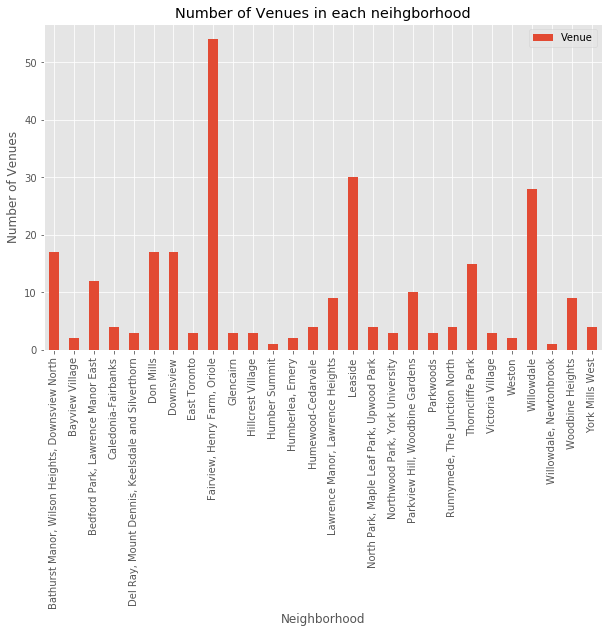

In [319]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

T.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Number of Venues in each neihgborhood') # add title to the plot

### The Neighborhoods wich has the Most Venues wich will help to make the New restaurants more wanted are 
#### Bathurst Manor, Wilson Heights, Downsview North
#### Don Mills
#### Downsview
#### airview, Henry Farm, Oriole
#### Willowdale


#### Leaside

In [138]:
Listb = ['Bathurst Manor, Wilson Heights, Downsview North','Don Mills','Downsview','airview, Henry Farm, Oriole','Willowdale']

In [139]:
# one hot encoding
York1_onehot = pd.get_dummies(YV[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
York1_onehot['Neighborhood'] = YV['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [York1_onehot.columns[-1]] + list(York1_onehot.columns[:-1])
York1_onehott = York1_onehot[fixed_columns]

York1_onehot.head()

,Accessories Store,Airport,Arts & Crafts Store,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Chocolate Shop,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Field,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Intersection,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Metro Station,Miscellaneous Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pub,Record Shop,Salon / Barbershop,Sandwich Place,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Tea Room,Theater,Toy / Game Store,Trail,Video Game Store,Video Store,Warehouse Store,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hillcrest Village
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hillcrest Village
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hillcrest Village
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"Fairview, Henry Farm, Oriole"
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,"Fairview, Henry Farm, Oriole"


In [140]:
York1_grouped = York1_onehot.groupby('Neighborhood').mean().reset_index()
York1_grouped

,Neighborhood,Accessories Store,Airport,Arts & Crafts Store,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Chocolate Shop,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Field,Fish & Chips Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Intersection,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Metro Station,Miscellaneous Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pub,Record Shop,Salon / Barbershop,Sandwich Place,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Tea Room,Theater,Toy / Game Store,Trail,Video Game Store,Video Store,Warehouse Store,Women's Store,Yoga Studio
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.058824,0.058824,0.000000,0.058824,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.00,0.000000,0.058824,0.000000,0.000000,0.000000
1,Bayview Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [141]:
num_top_venues = 5

for hood in York1_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = York1_grouped[York1_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0  Coffee Shop  0.12
1         Bank  0.12
2  Bridal Shop  0.06
3  Supermarket  0.06
4  Pizza Place  0.06


----Bayview Village----
               venue  freq
0               Café   0.5
1               Bank   0.5
2  Accessories Store   0.0
3       Liquor Store   0.0
4           Pharmacy   0.0


----Bedford Park, Lawrence Manor East----
            venue  freq
0     Coffee Shop  0.17
1  Sandwich Place  0.17
2       Juice Bar  0.08
3     Pizza Place  0.08
4        Pharmacy  0.08


----Caledonia-Fairbanks----
               venue  freq
0               Park  0.50
1      Women's Store  0.25
2               Pool  0.25
3  Accessories Store  0.00
4          Juice Bar  0.00


----Del Ray, Mount Dennis, Keelsdale and Silverthorn----
               venue  freq
0     Sandwich Place  0.33
1       Skating Rink  0.33
2        Coffee Shop  0.33
3  Accessories Store  0.00
4             Lounge  0.00


----Don Mills----
         

In [142]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [143]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_y2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_y2['Neighborhood'] = York1_grouped['Neighborhood']

for ind in np.arange(York1_grouped.shape[0]):
    neighborhoods_venues_sorted_y2.iloc[ind, 1:] = return_most_common_venues(York1_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_y2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Frozen Yogurt Shop,Pharmacy,Shopping Mall,Deli / Bodega,Ice Cream Shop,Diner,Pizza Place,Supermarket
1,Bayview Village,Café,Bank,Yoga Studio,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
2,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Pharmacy,Juice Bar,Butcher,Pizza Place,Pub,Liquor Store,Café,Grocery Store
3,Caledonia-Fairbanks,Park,Women's Store,Pool,Dessert Shop,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice
4,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",Coffee Shop,Sandwich Place,Skating Rink,Yoga Studio,Dessert Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice


#### Let us filter only the most crowded neigboroods by venues 

In [144]:
Listb

['Bathurst Manor, Wilson Heights, Downsview North',
 'Don Mills',
 'Downsview',
 'airview, Henry Farm, Oriole',
 'Willowdale']

In [145]:
Resultb=neighborhoods_venues_sorted_y2.query('Neighborhood=="Bathurst Manor, Wilson Heights, Downsview North"or Neighborhood=="Don Mills" or Neighborhood=="Downsview" or Neighborhood=="airview, Henry Farm, Oriole" or Neighborhood=="Willowdale" ')  

In [146]:
Resultb


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Frozen Yogurt Shop,Pharmacy,Shopping Mall,Deli / Bodega,Ice Cream Shop,Diner,Pizza Place,Supermarket
5,Don Mills,Coffee Shop,Beer Store,Gym,Bubble Tea Shop,Sandwich Place,Discount Store,Concert Hall,Bike Shop,Sporting Goods Shop,Gym / Fitness Center
6,Downsview,Grocery Store,Park,Liquor Store,Baseball Field,Shopping Mall,Gym / Fitness Center,Snack Place,Bus Stop,Hotel,Home Service
24,Willowdale,Coffee Shop,Pizza Place,Café,Sandwich Place,Shopping Mall,Juice Bar,Butcher,Ice Cream Shop,Movie Theater,Hotel


#### Let us contunue our modelin to cluster the neighborhoods by their venus except the restaurants

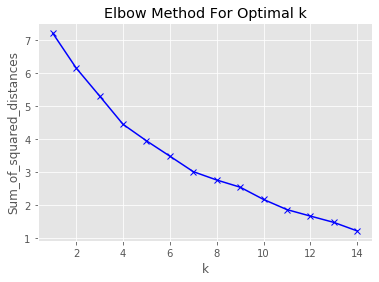

In [320]:
York_grouped_clustering_y1= York1_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(York_grouped_clustering_y1)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [148]:
kclusters = 8


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(York_grouped_clustering_y1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 0, 2, 0, 0, 0, 2, 0, 2], dtype=int32)

In [150]:
neighborhoods_venues_sorted_y2.insert(0, 'Cluster Labels', kmeans.labels_)
York1_merged = York_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
York1_merged = York1_merged.join(neighborhoods_venues_sorted_y2.set_index('Neighborhood'), on='Neighborhood')

York1_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,6.0,Pool,Golf Course,Dog Run,Yoga Studio,Dessert Shop,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
18,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0.0,Clothing Store,Coffee Shop,Bank,Women's Store,Bakery,Burrito Place,Movie Theater,Distribution Center,Metro Station,Luggage Store
19,M2K,North York,Bayview Village,43.786947,-79.385975,3.0,Café,Bank,Yoga Studio,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
20,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,4.0,Home Service,Yoga Studio,Diner,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega


In [151]:
York2_merged=York1_merged.fillna(10)
York2_merged
indexNames2 = York2_merged[ York2_merged['Cluster Labels'] ==10.0].index
York2_merged.drop(indexNames2 , inplace=True)
York2_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,6.0,Pool,Golf Course,Dog Run,Yoga Studio,Dessert Shop,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
18,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0.0,Clothing Store,Coffee Shop,Bank,Women's Store,Bakery,Burrito Place,Movie Theater,Distribution Center,Metro Station,Luggage Store
19,M2K,North York,Bayview Village,43.786947,-79.385975,3.0,Café,Bank,Yoga Studio,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
21,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,4.0,Home Service,Yoga Studio,Diner,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
22,M2N,North York,Willowdale,43.770120,-79.408493,0.0,Coffee Shop,Pizza Place,Café,Sandwich Place,Shopping Mall,Juice Bar,Butcher,Ice Cream Shop,Movie Theater,Hotel


In [154]:
York2_merged['Cluster Labels']=York2_merged['Cluster Labels'].astype(int)
York2_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M2H,North York,Hillcrest Village,43.803762,-79.363452,6,Pool,Golf Course,Dog Run,Yoga Studio,Dessert Shop,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
18,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0,Clothing Store,Coffee Shop,Bank,Women's Store,Bakery,Burrito Place,Movie Theater,Distribution Center,Metro Station,Luggage Store
19,M2K,North York,Bayview Village,43.786947,-79.385975,3,Café,Bank,Yoga Studio,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
21,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,4,Home Service,Yoga Studio,Diner,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega
22,M2N,North York,Willowdale,43.770120,-79.408493,0,Coffee Shop,Pizza Place,Café,Sandwich Place,Shopping Mall,Juice Bar,Butcher,Ice Cream Shop,Movie Theater,Hotel


In [152]:
latitude = 43.6532
longitude = -79.3832

In [321]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(York2_merged['Latitude'], York2_merged['Longitude'], York2_merged['Neighborhood'], York2_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

### Lest us explore the clusters 

### Cluster 1 

In [156]:
York2_merged.loc[York2_merged['Cluster Labels'] == 0, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,"Fairview, Henry Farm, Oriole",-79.346556,0,Clothing Store,Coffee Shop,Bank,Women's Store,Bakery,Burrito Place,Movie Theater,Distribution Center,Metro Station,Luggage Store
22,Willowdale,-79.408493,0,Coffee Shop,Pizza Place,Café,Sandwich Place,Shopping Mall,Juice Bar,Butcher,Ice Cream Shop,Movie Theater,Hotel
24,Willowdale,-79.442259,0,Coffee Shop,Pizza Place,Café,Sandwich Place,Shopping Mall,Juice Bar,Butcher,Ice Cream Shop,Movie Theater,Hotel
26,Don Mills,-79.352188,0,Coffee Shop,Beer Store,Gym,Bubble Tea Shop,Sandwich Place,Discount Store,Concert Hall,Bike Shop,Sporting Goods Shop,Gym / Fitness Center
27,Don Mills,-79.340923,0,Coffee Shop,Beer Store,Gym,Bubble Tea Shop,Sandwich Place,Discount Store,Concert Hall,Bike Shop,Sporting Goods Shop,Gym / Fitness Center
28,"Bathurst Manor, Wilson Heights, Downsview North",-79.442259,0,Coffee Shop,Bank,Frozen Yogurt Shop,Pharmacy,Shopping Mall,Deli / Bodega,Ice Cream Shop,Diner,Pizza Place,Supermarket
30,Downsview,-79.464763,0,Grocery Store,Park,Liquor Store,Baseball Field,Shopping Mall,Gym / Fitness Center,Snack Place,Bus Stop,Hotel,Home Service
31,Downsview,-79.506944,0,Grocery Store,Park,Liquor Store,Baseball Field,Shopping Mall,Gym / Fitness Center,Snack Place,Bus Stop,Hotel,Home Service
32,Downsview,-79.495697,0,Grocery Store,Park,Liquor Store,Baseball Field,Shopping Mall,Gym / Fitness Center,Snack Place,Bus Stop,Hotel,Home Service
33,Downsview,-79.520999,0,Grocery Store,Park,Liquor Store,Baseball Field,Shopping Mall,Gym / Fitness Center,Snack Place,Bus Stop,Hotel,Home Service


### the most trended venues  beer shop pizza place, clotething and cafe shop 
#### we can see that  Fairview, Henry Farm, Oriole and Willowdale and Don Mills are in tis cluster

### Cluster2

In [157]:
York2_merged.loc[York2_merged['Cluster Labels'] == 1, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
96,Humber Summit,-79.565963,1,Pizza Place,Fried Chicken Joint,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega


### cluster 3

In [158]:
York2_merged.loc[York2_merged['Cluster Labels'] == 2, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,York Mills West,-79.400049,2,Park,Convenience Store,Bank,Yoga Studio,Diner,Concert Hall,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega
25,Parkwoods,-79.329656,2,Park,Food & Drink Shop,Construction & Landscaping,Yoga Studio,Dessert Shop,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Curling Ice
40,East Toronto,-79.338106,2,Coffee Shop,Park,Convenience Store,Yoga Studio,Fried Chicken Joint,Concert Hall,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega
72,Glencairn,-79.445073,2,Pizza Place,Park,Pub,Department Store,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
74,Caledonia-Fairbanks,-79.453512,2,Park,Women's Store,Pool,Dessert Shop,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice
98,Weston,-79.518188,2,Park,Convenience Store,Yoga Studio,Fried Chicken Joint,Coffee Shop,Concert Hall,Construction & Landscaping,Cosmetics Shop,Curling Ice,Deli / Bodega


### Cluster 4

In [160]:
York2_merged.loc[York2_merged['Cluster Labels'] == 3, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Bayview Village,-79.385975,3,Café,Bank,Yoga Studio,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega


### Cluster 5

In [317]:
York2_merged.loc[York2_merged['Cluster Labels'] == 4, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,York Mills West,-79.400049,4,Park,Convenience Store,Bank,Yoga Studio,Dessert Shop,Coffee Shop,Concert Hall,Construction & Landscaping,Cosmetics Shop,Curling Ice
40,East Toronto,-79.338106,4,Park,Convenience Store,Yoga Studio,Fried Chicken Joint,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Cosmetics Shop,Curling Ice
74,Caledonia-Fairbanks,-79.453512,4,Park,Women's Store,Bar,Diner,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice
98,Weston,-79.518188,4,Park,Convenience Store,Yoga Studio,Fried Chicken Joint,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Cosmetics Shop,Curling Ice


### Custer 6

In [161]:
York2_merged.loc[York2_merged['Cluster Labels'] == 5, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
97,"Humberlea, Emery",-79.532242,5,Food Service,Baseball Field,Yoga Studio,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega


### Cluster 7

In [165]:
York2_merged.loc[York2_merged['Cluster Labels'] == 6, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Hillcrest Village,-79.363452,6,Pool,Golf Course,Dog Run,Yoga Studio,Dessert Shop,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop


### Cluster 8

In [163]:
York2_merged.loc[York2_merged['Cluster Labels'] == 7, York2_merged.columns[[2] + list(range(4, York2_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,"Northwood Park, York University",-79.487262,7,Coffee Shop,Massage Studio,Bar,Diner,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Curling Ice,Deli / Bodega


## Third 
### After Analysing the location and the most trended restaurants besides we find out which neighborhoods have the least number of restaurants 
### And which  neighborhoods have the most other  venues and what kind of them 

### Now lets get the population the density , average income and the most common language except english in each neighborhood 
### this information will help us to decide where to open the restaurant based on these attributes and what kind of restaurants 

In [167]:
import requests

from bs4 import BeautifulSoup

req2 = requests.get("https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods")

soup2 = BeautifulSoup(req2.content,'lxml')

table2 = soup2.find_all('table')[1]

df2 = pd.read_html(str(table2))

Dem2=pd.DataFrame(df2[0])

Dem2.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


#### we will filter the table only for York region 

In [168]:
Df_pop=Dem2.query('FM=="NY" or FM=="Y" or FM=="EY"')
Df_pop.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
5,Amesbury,NY,"0280.00, 0281.01, 0281.02",17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish,NaN
6,Armour Heights,NY,0298.00,4384,2.29,1914,2.0,116651,10.8,16.1,Russian (9.4%),09.4% Russian,NaN
7,Banbury,NY,0267.00,6641,2.72,2442,5.0,92319,6.1,4.8,Unspecified Chinese (5.1%),05.1% Unspecified Chinese,NaN
8,Bathurst Manor,NY,"0297.01, 0310.01, 0310.02",14945,4.69,3187,12.3,34169,13.4,18.6,Russian (9.5%),09.5% Russian,NaN
10,Bayview Village,NY,"0305.01, 305.02",12280,4.14,2966,41.6,46752,14.4,15.6,Cantonese (8.4%),08.4% Cantonese,NaN


In [ ]:
Df_pop1=Df_pop.drop(['Census Tracts', 'Land area (km2)', '% Change in Population since 2001','% Renters','Map'], axis=1)

Df_pop1.shape


In [172]:
Listb

['Bathurst Manor, Wilson Heights, Downsview North',
 'Don Mills',
 'Downsview',
 'airview, Henry Farm, Oriole',
 'Willowdale']

In [219]:
df_dem=Df_pop1.query('Name=="Bathurst Manor" or Name=="Leaside" or Name=="Wilson Heights" or Name=="Downsview North" or Name=="Don Mills" or Name=="Downsview" or Name=="Airview" or Name=="Henry Farm" or Name=="Oriole" or Name=="Willowdale" ')

In [220]:
df_dem

,Name,FM,Population,Density (people/km2),Average Income,Transit Commuting %,Second most common language (after English) by name,Second most common language (after English) by percentage
8,Bathurst Manor,NY,14945,3187,34169,13.4,Russian (9.5%),09.5% Russian
40,Don Mills,NY,21372,2377,47515,10.8,Unspecified Chinese (3.9%),03.9% Unspecified Chinese
44,Downsview,NY,36613,2270,26751,14.4,Italian (11.7%),11.7% Italian
67,Henry Farm,NY,2790,3066,56395,15.6,Mandarin (3.9%),03.9% Mandarin
91,Leaside,EY,13876,4938,82670,9.7,Bulgarian (0.4%),00.4% Bulgarian
168,Willowdale,NY,43144,5618,39895,15.6,Cantonese (7.9%),07.9% Cantonese
169,Wilson Heights,NY,13732,3317,37978,15.9,Filipino (6.2%),06.2% Filipino


In [ ]:
df_dem.set_index('Locality', inplace=True)

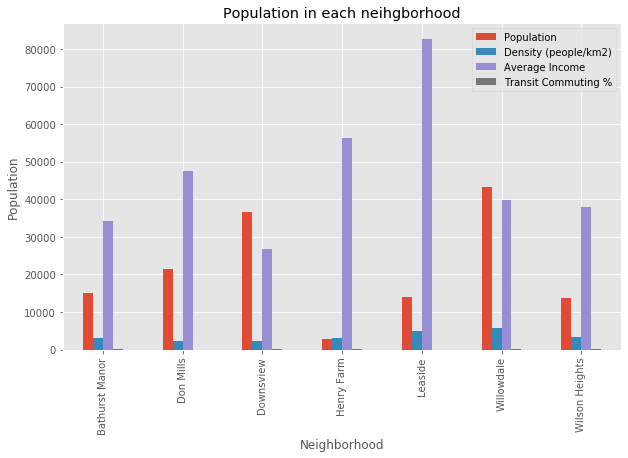

In [322]:
df_dem.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Population in each neihgborhood') # add title to the plot

plt.show()

#### Looking at the plot we can see that Wilodala has the biggest population and a good average salary 
#### also Downsview has a good number pf population and average salary 
#### Leaside is not convenient as it has small number of population and it is the most important attribute  but the salary average is high 
#### it can be cuz there is no big number of people live there

#### let us recall how many venues has the two neighbor hoods 

In [227]:

Num_V = T.query('Neighborhood =="Downsview" or Neighborhood=="Willowdale"or Neighborhood=="Don Mills" or Neighborhood=="Leaside"')
Num_V


,Venue
Neighborhood,
Don Mills,17
Downsview,17
Leaside,30
Willowdale,28


#### let us recall how many Restaurants has the two neighbor hoods

In [228]:
Num_R = Y11.query('Neighborhood =="Downsview" or Neighborhood=="Willowdale" or Neighborhood=="Don Mills" or Neighborhood=="Leaside"')
Num_R

,Venue
Neighborhood,
Don Mills,10
Downsview,1
Leaside,3
Willowdale,12


In [ ]:
#let us see what types of restuarants 

In [229]:
DF_type=York_df2.query('Neighborhood =="Downsview" or Neighborhood=="Willowdale" or Neighborhood=="Don Mills" or Neighborhood=="Leaside"')

In [233]:

DF_type1=DF_type[['Neighborhood','Venue','Venue Category']]

In [234]:
DF_type1

,Neighborhood,Venue,Venue Category
75,Willowdale,Konjiki Ramen,Ramen Restaurant
78,Willowdale,Satay Sate,Indonesian Restaurant
84,Willowdale,Wako Sushi + Bar,Japanese Restaurant
89,Willowdale,Ajisen Ramen 味千ラーメン,Ramen Restaurant
91,Willowdale,Aburi Room,Sushi Restaurant
95,Willowdale,Shawarma Max,Middle Eastern Restaurant
96,Willowdale,Symposium Cafe Restaurant & Lounge,Restaurant
99,Willowdale,KINTON RAMEN,Ramen Restaurant
101,Willowdale,Pho 88 Vietnamese Cuisine,Vietnamese Restaurant
102,Willowdale,Wendy’s,Fast Food Restaurant


In [ ]:
### Let us see what are the most common trended Restaurants 

In [251]:
R_trend = York_merged1.query('Neighborhood =="Downsview" or Neighborhood=="Willowdale" or Neighborhood=="Don Mills" or Neighborhood=="Leaside"')

In [252]:
R_trend

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restuarant,2nd Most Common Restuarant,3rd Most Common Restuarant,4th Most Common Restuarant,5th Most Common Restuarant,6th Most Common Restuarant,7th Most Common Restuarant,8th Most Common Restuarant,9th Most Common Restuarant,10th Most Common Restuarant
22,M2N,North York,Willowdale,43.770120,-79.408493,0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
24,M2R,North York,Willowdale,43.782736,-79.442259,0,Ramen Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Japanese Restaurant,Indonesian Restaurant,Fast Food Restaurant,Greek Restaurant,Asian Restaurant
26,M3B,North York,Don Mills,43.745906,-79.352188,0,Asian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indonesian Restaurant,Comfort Food Restaurant,Fast Food Restaurant
27,M3C,North York,Don Mills,43.725900,-79.340923,0,Asian Restaurant,Restaurant,Japanese Restaurant,Italian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indonesian Restaurant,Comfort Food Restaurant,Fast Food Restaurant
30,M3K,North York,Downsview,43.737473,-79.464763,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
31,M3L,North York,Downsview,43.739015,-79.506944,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
32,M3M,North York,Downsview,43.728496,-79.495697,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
33,M3N,North York,Downsview,43.761631,-79.520999,1,Korean Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Greek Restaurant
38,M4G,East York,Leaside,43.709060,-79.363452,0,Sushi Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant


#### we can see that all these neiborhoods are in two cluster , cluster 1 and cluster 2 
#### Leaside , willodale and don mils cluster 1
#### Downsview cluster 2


## looking at it all we can recommend to open a restaurant in Donsview as it has only one Korean restaurant 
### 1-is neighbourood has a good population and good average salary
### 2-it has 11 percent of italian native language speakers 
### 3- and based on clustering the most trended restaurant categories are asian categories 
### 4-finally it has a good number of other venues 